<a href="https://colab.research.google.com/github/ksm999/QuantumComputing/blob/main/Projection_Method_3D_to_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3D_to_2D_Projection_Method
In this code, I want to check several method to project 3d image to 2d space or inverse.


## Stereographic projection
In mathematics, a stereographic projection is a perspective projection of the sphere, through a specific point on the sphere (the pole or center of projection), onto a plane (the projection plane) perpendicular to the diameter through the point. - wikipedia.

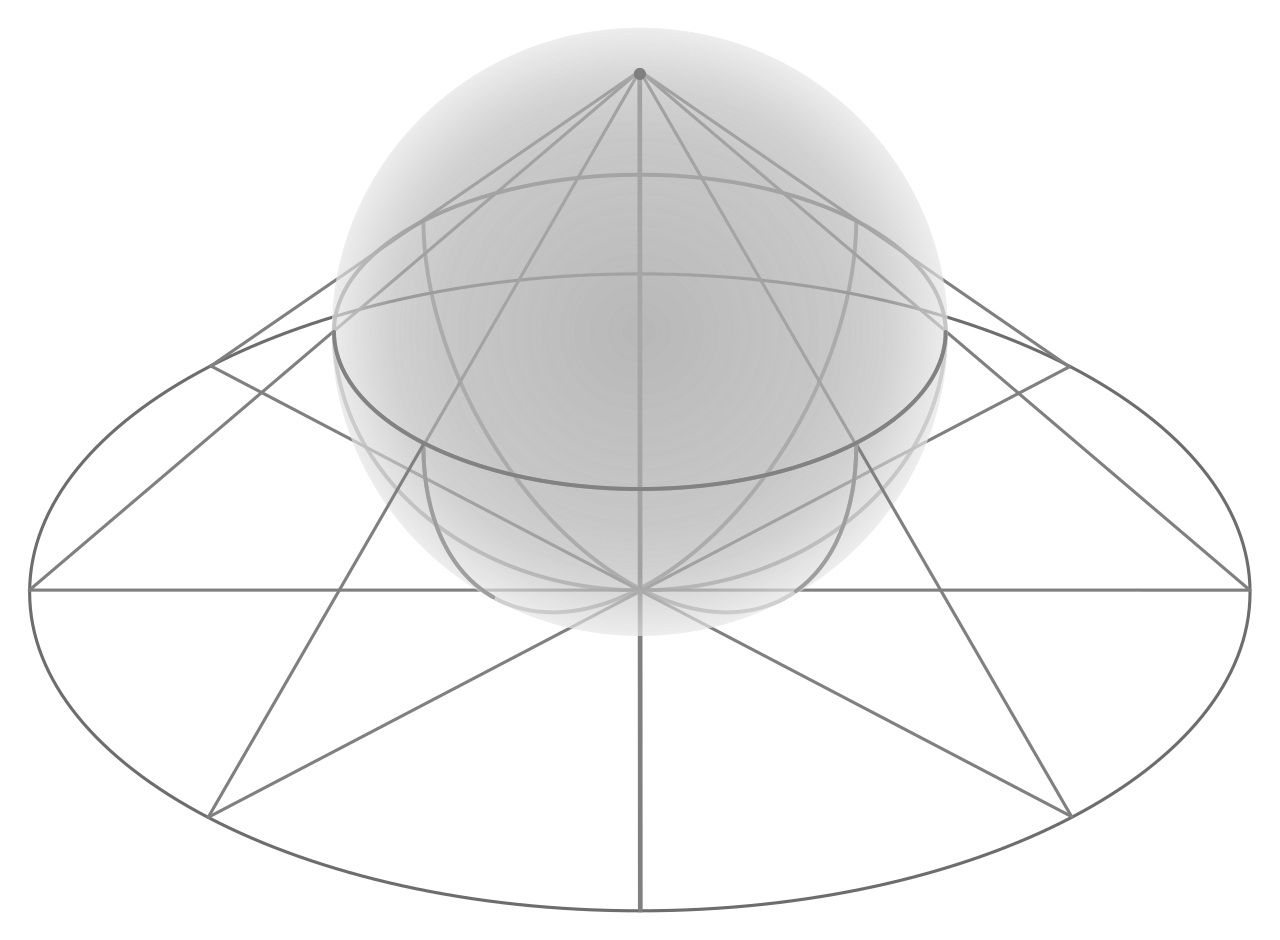

### Basemap Tutorials
Stereographic projection을 실행해보기 전 Basemap에 대한 Tutorials 해보기.

What is Basemap?
GEOS에 기반하여 2D 데이터를 지도에 플로팅 할 수 있는 Matplotlib toolkit.

GEOS : Geometry Engine Open Source

In [ ]:
!pip install basemap

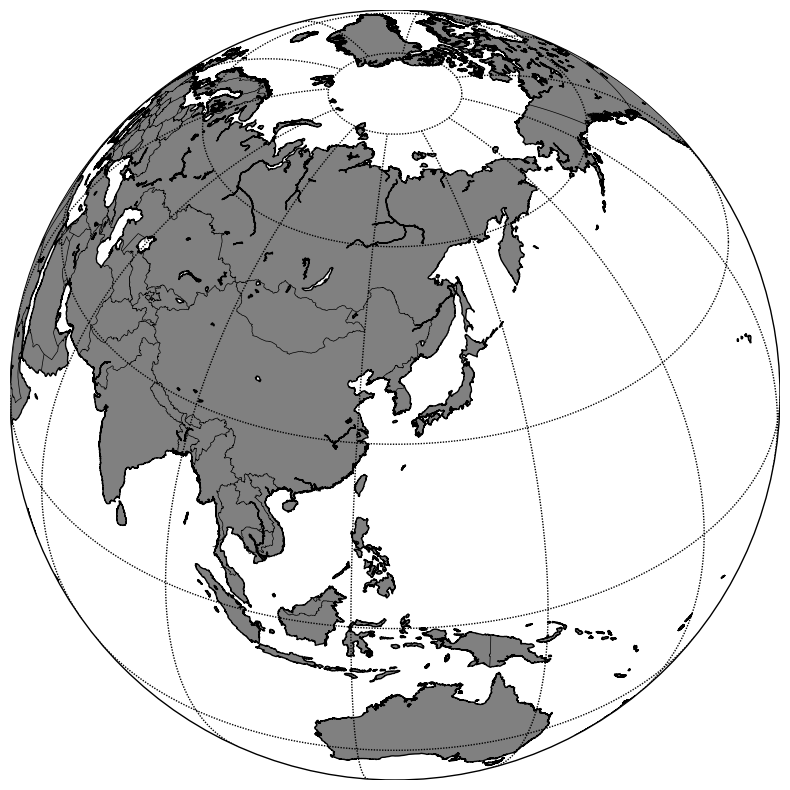

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import style

plt.figure(figsize=(10,10))
m = Basemap(projection='ortho',lat_0=37.35, lon_0=126.58, resolution='i',area_thresh=1000.0)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='gray')
m.drawmeridians(np.arange(0, 360, 30))
m.drawparallels(np.arange(-90, 90, 30))
plt.show()

<ipython-input-3-7aaf470779f3>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-talk')


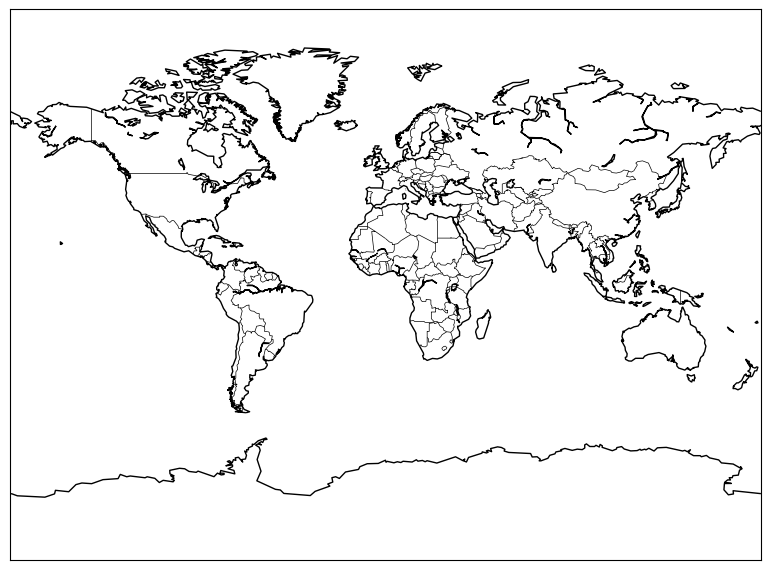

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import style

style.use('seaborn-talk')

m = Basemap(projection='mill')
m.drawcoastlines()   # 해안선
m.drawcountries()    # 국경선
plt.show()

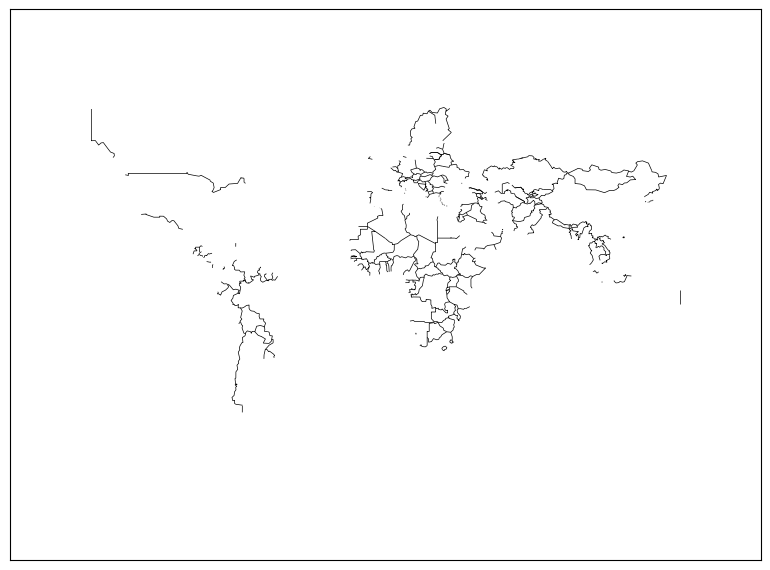

In [ ]:
m = Basemap(projection='mill')
m.drawcountries()
plt.show()

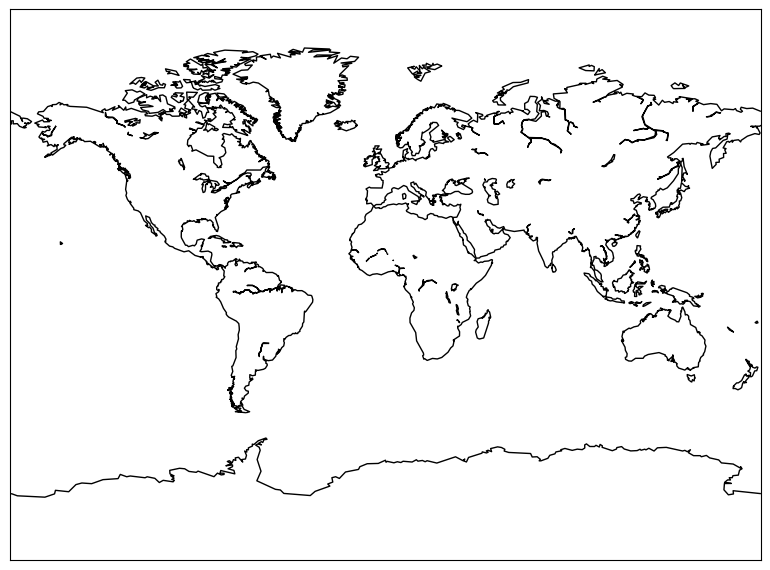

In [ ]:
m = Basemap(projection='mill')
m.drawcoastlines()
plt.show()

<ipython-input-7-00f869f3f7ca>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-talk')


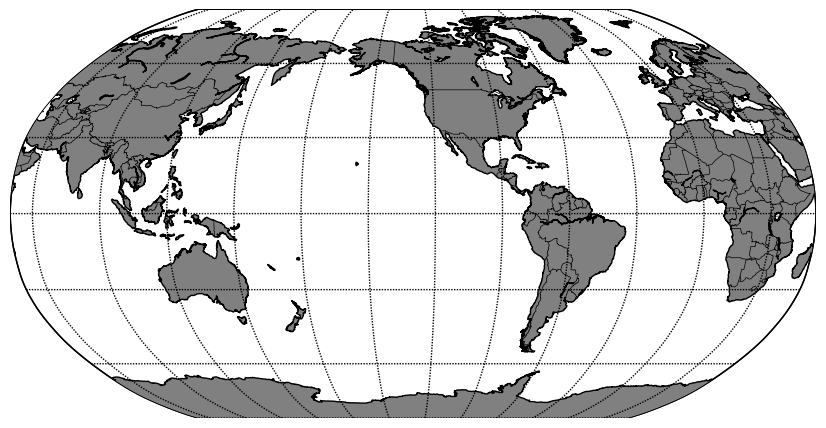

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import style

style.use('seaborn-talk')

m = Basemap(projection='robin', resolution = 'l', area_thresh = 10000.0,
            lat_0=0,lon_0=-130)      # 지도 형태를 'robin'으로 변경, 지도의 중심을 동경 130도로 설정
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='gray')    # 지도에서 대륙 부분을 회색으로 채움
m.drawmapboundary()
m.drawmeridians(np.arange(0,360,30))   # 위도선 (위선:적도에 평행)
m.drawparallels(np.arange(-90,90,30))  # 경도선  두 선을 각각 30도 간격으로 그려
plt.show()

### Stereographic projection Visualize

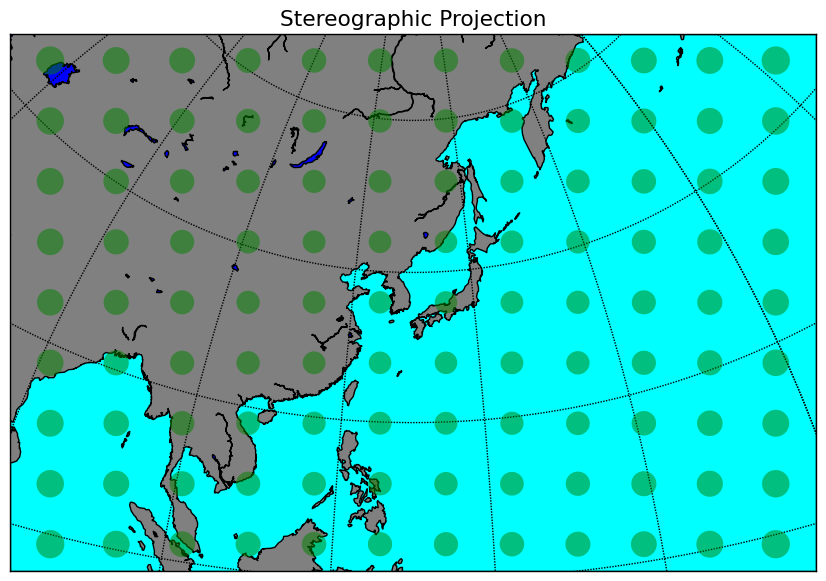

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# setup stereographic basemap
# lat_ts is latitude of true scale.
# lon_0, lat_0 is central point.
# resolution : resolution of boundary databvase to use, 사용할 경계 데이터베이스 결정
# c(crude), l(low), i(intermediate), h(high), f(full) or None

m = Basemap(width=12000000, height=8000000,
            resolution='l', projection='stere',
            lat_ts=50, lat_0=36, lon_0=130.)
m.drawcoastlines()
m.fillcontinents(color='gray',lake_color='blue')
# Draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua')
# Draw tissot's indicatrix to show distortion.
ax = plt.gca()
for y in np.linspace(m.ymax/20,19*m.ymax/20,9):
  for x in np.linspace(m.xmax/20, 19*m.xmax/20,12):
    lon, lat = m(x,y,inverse=True)
    poly = m.tissot(lon,lat,1.5,100,
                    facecolor='green',zorder=10,alpha=0.5)
plt.title("Stereographic Projection")
plt.show()

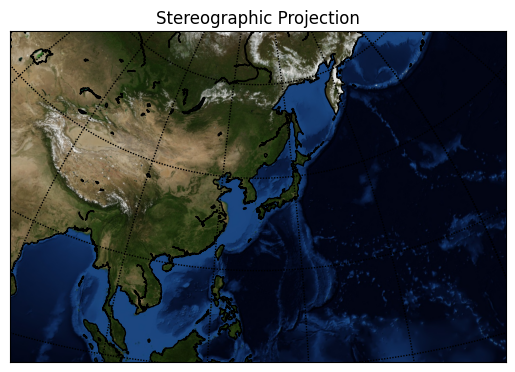

In [ ]:
m = Basemap(width=12000000, height=8000000,
            resolution='l', projection='stere',
            lat_ts=50, lat_0=36, lon_0=130.)
m.drawcoastlines()
# Draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
# Draw tissot's indicatrix to show distortion.
m.bluemarble()
plt.title("Stereographic Projection")
plt.show()

## Mercator Projection


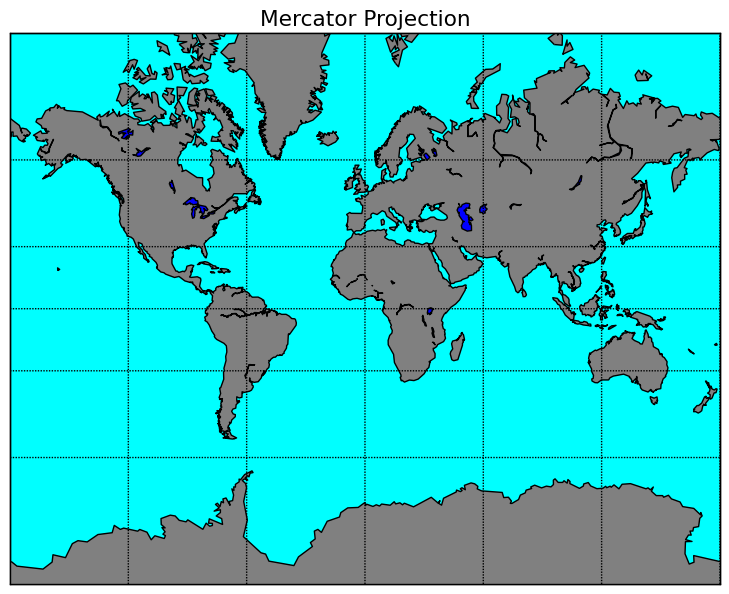

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# llcrnrlat, llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.

# llcrnrlat: latitude of lower left hand corner of the desired map domain
# llcrnrlon: longitude of power left hand corner of the desired map domain
# urcrnrlat: latitude of upper right hand corner of the desired map domain
# urcrnrlon: longitude of upper right hand corner of the desired map domain

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='gray', lake_color='blue')
# Draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title('Mercator Projection')
plt.show()

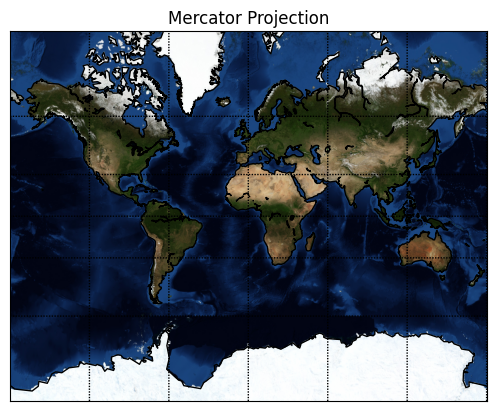

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# llcrnrlat, llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map
# lat_ts is the latitude of true scale.
# resolution = 'c' means use crude resolution coastlines.

# llcrnrlat: latitude of lower left hand corner of the desired map domain
# llcrnrlon: longitude of power left hand corner of the desired map domain
# urcrnrlat: latitude of upper right hand corner of the desired map domain
# urcrnrlon: longitude of upper right hand corner of the desired map domain

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
m.drawcoastlines()
# Draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.bluemarble()
plt.title('Mercator Projection')
plt.show()

#### Converting to and from map projection coordinates

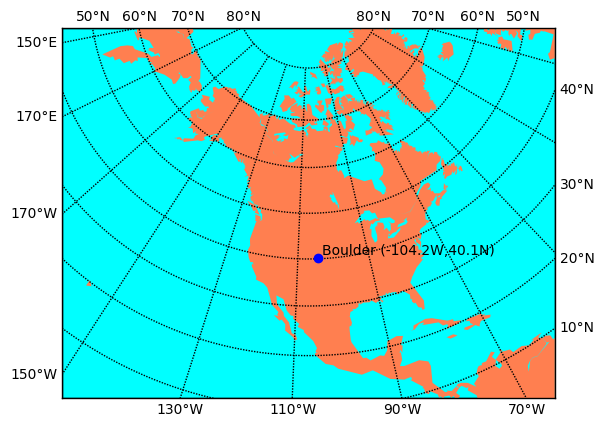

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')

# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')

# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

# plot blue dot on Boulder, colorado and label it as such.
lon, lat = -104.237, 40.125 # Location of Boulder
# convert to map projection coords.

# Note that lon,lat can be scalars, lists or numpy arrays.
xpt,ypt = m(lon,lat)
# convert back to lat/lon
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'bo')  # plot a blue dot there
# put some text next to the dot, offset a little bit
# (the offset is in map projection coordinates)
plt.text(xpt+100000,ypt+100000,'Boulder (%5.1fW,%3.1fN)' % (lonpt,latpt))
plt.show()